#### Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

**HR Analytics** 

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

**Attrition in HR**

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

**Attrition affecting Companies**

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


In [1]:
# importing necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the dataset from the system
hr_data = pd.read_csv(r"C:\Users\LENOVO\Downloads\HR-Employee-Attrition.csv")
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# shape of dataset
print("Dimension of the dats is: ", hr_data.shape)

Dimension of the dats is:  (1470, 35)


In [4]:
# checking the column names
hr_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Details of few columns--

**Education--**
1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'.

**JobInvolvement--**
1 'Low', 2 'Medium', 3 'High', 4 'Very High'

**JobSatisfaction--**
1 'Low', 2 'Medium', 3 'High', 4 'Very High'

**PerformanceRating--**
1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding'

**RelationshipSatisfaction--**
1 'Low', 2 'Medium', 3 'High', 4 'Very High'

**WorkLifeBalance--**
1 'Bad', 2 'Good', 3 'Better', 4 'Best'

In [5]:
# lets check for datatype
hr_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

There are some columns that can be dropped as they add no value:

1. Employee Count
2. EmployeeNumber
3. StandardHours: Everyone's working 80 hours
4. Over18: Everyone who works is above 18

In [6]:
hr_data.drop(['EmployeeCount','EmployeeNumber', 'StandardHours','Over18'], axis=1, inplace=True)

In [7]:
hr_data.shape #4 columns have been dropped 

(1470, 31)

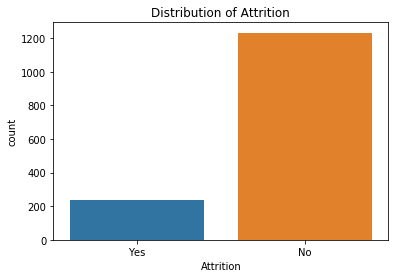

In [8]:
# lets check for the target variable (attrition column)
sns.countplot(data=hr_data, x='Attrition')
plt.title("Distribution of Attrition")
plt.show()

In [9]:
# lets find the attrition rate
print(hr_data['Attrition'].value_counts())
percent = (hr_data['Attrition'].value_counts()/hr_data['Attrition'].value_counts().sum())*100
percent

No     1233
Yes     237
Name: Attrition, dtype: int64


No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

We can see that the dataset has an imbalanced distribution of attrition (employees who left) and non-attrition (employees who stayed). 16% of people left the company.

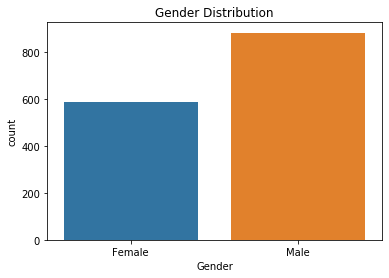

In [10]:
# lets check for the gender distribution
sns.countplot(data=hr_data, x='Gender')
plt.title("Gender Distribution")
plt.show()

In [11]:
# lets find the gender distribution
print(hr_data['Gender'].value_counts())
percent_g = (hr_data['Gender'].value_counts()/hr_data['Gender'].value_counts().sum())*100
percent_g

Male      882
Female    588
Name: Gender, dtype: int64


Male      60.0
Female    40.0
Name: Gender, dtype: float64

40% of the people in the dataset are females.

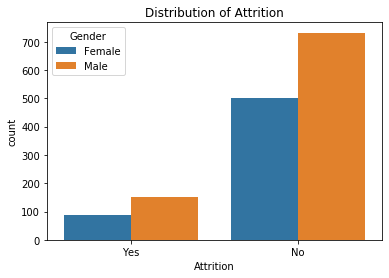

Gender        Female       Male
Attrition                      
No         40.632603  59.367397
Yes        36.708861  63.291139


In [12]:
# lets check the attribution column with gender distribution
sns.countplot(data=hr_data, x='Attrition', hue='Gender')
plt.title("Distribution of Attrition")
plt.show()

changed = pd.crosstab(hr_data['Attrition'], hr_data['Gender'], normalize='index')*100
print(changed)

Out of the people who switched, 36.7% are females and the rest are males. We can see that males have a higher attrition rate.

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
****************************************
Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92


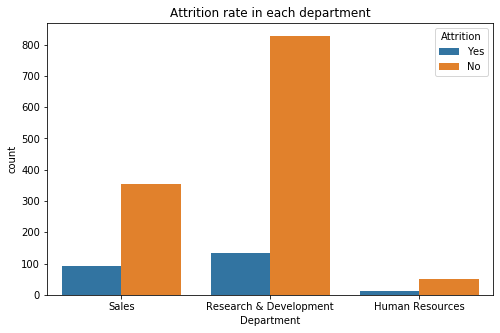

In [13]:
# lets check the attrition rate in each department
print(hr_data['Department'].value_counts())
print('*'*40)
changed = pd.crosstab(hr_data['Attrition'], hr_data['Department'])
print(changed)

plt.figure(figsize=(8,5))
sns.countplot(data=hr_data, hue='Attrition', x='Department')
plt.title("Attrition rate in each department")
plt.show()


Most of the people in the dataset belongs to R&D department and this department also have the highest attrition rate. Least number of people are in the HR department and it also has the lowest attrition rate.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
****************************************
MaritalStatus  Divorced  Married  Single
Attrition                               
No                  294      589     350
Yes                  33       84     120


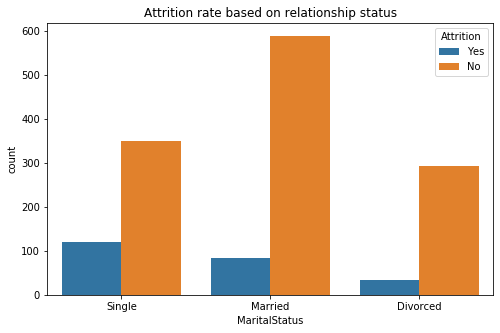

In [14]:
# lets check the attrition rate based on the relationship status
print(hr_data['MaritalStatus'].value_counts())
print('*'*40)
changed = pd.crosstab(hr_data['Attrition'], hr_data['MaritalStatus'])
print(changed)

plt.figure(figsize=(8,5))
sns.countplot(data=hr_data, hue='Attrition', x='MaritalStatus')
plt.title("Attrition rate based on relationship status")
plt.show()


Most of the people in the dataset are married but attrition rate is higher in single people. Divorced people are the the least number in dataset and tey also have the leowest attrition rate.

3    1244
4     226
Name: PerformanceRating, dtype: int64
****************************************
PerformanceRating     3    4
Attrition                   
No                 1044  189
Yes                 200   37


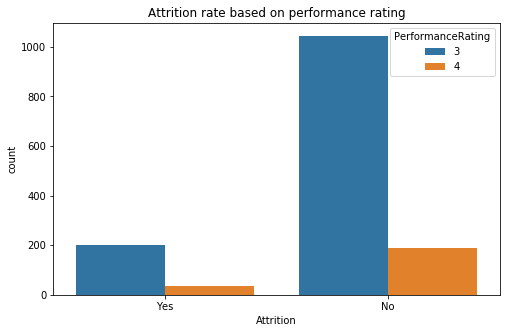

In [15]:
# lets check the attrition rate based on the performance rating
print(hr_data['PerformanceRating'].value_counts())
print('*'*40)
changed = pd.crosstab(hr_data['Attrition'], hr_data['PerformanceRating'])
print(changed)

plt.figure(figsize=(8,5))
sns.countplot(data=hr_data, x='Attrition', hue='PerformanceRating')
plt.title("Attrition rate based on performance rating")
plt.show()

Most of the people have a performance rating of 3. The attrition rate is higher among people with performance rating of 3.

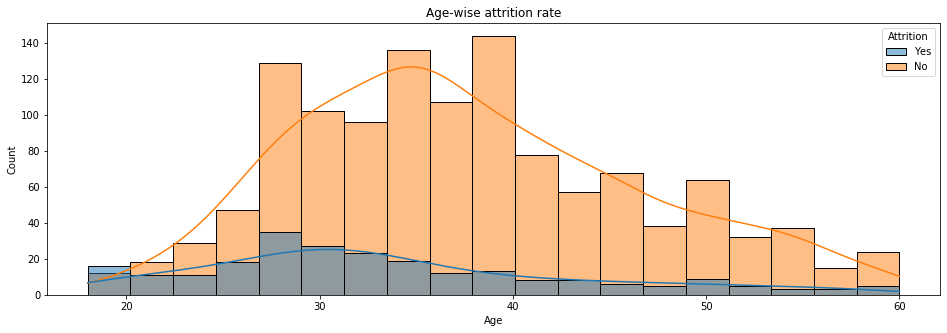

In [16]:
# lets see the attrition rate agewise
plt.figure(figsize=(16,5))
sns.histplot(data=hr_data, x='Age', hue='Attrition', kde=True)
plt.title("Age-wise attrition rate")
plt.show()

Most of the people belongs to the age group og 26-40. Highest attrition rate is seen among the people belonging to the age group of 26-32.

In [17]:
# lets check the business travel column
print(hr_data['BusinessTravel'].value_counts())

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


In [18]:
# replacing the column values for a better understanding
hr_data['BusinessTravel'].replace({'Travel_Rarely':'Rarely', 'Travel_Frequently':"Frequently"}, inplace=True)

# lets check the value counts again
print(hr_data['BusinessTravel'].value_counts())

Rarely        1043
Frequently     277
Non-Travel     150
Name: BusinessTravel, dtype: int64


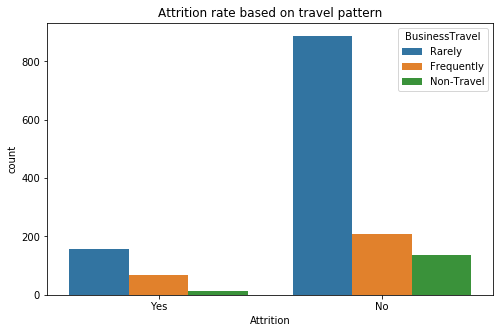

In [19]:
# lets plot this 
plt.figure(figsize=(8,5))
sns.countplot(data=hr_data, x='Attrition', hue='BusinessTravel')
plt.title("Attrition rate based on travel pattern")
plt.show()

Most of the people who switched rarely traveled.

In [20]:
# lets check the value counts for worklifebalance column
print(hr_data['WorkLifeBalance'].value_counts())
print('*'*40)


3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64
****************************************


**WorkLifeBalance--**
1 'Bad', 2 'Good', 3 'Better', 4 'Best'

In [21]:
changed = pd.crosstab(hr_data['Attrition'], hr_data['WorkLifeBalance'])
print(changed)

WorkLifeBalance   1    2    3    4
Attrition                         
No               55  286  766  126
Yes              25   58  127   27


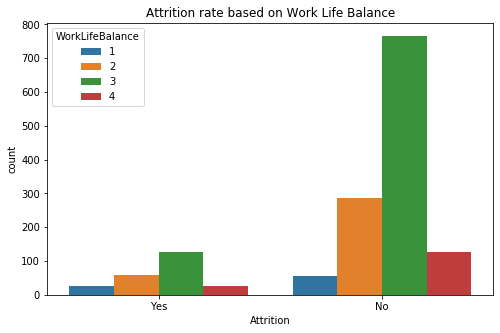

In [22]:
# plotting attriton rate based on the work life balance
plt.figure(figsize=(8,5))
sns.countplot(data=hr_data, x='Attrition', hue='WorkLifeBalance')
plt.title("Attrition rate based on Work Life Balance")
plt.show()

This plot shows a very unusual thing that is attrition is high among people that have their work life balance belonging to category 'better'. So, we can say that other factors also plays important roles in attrition.

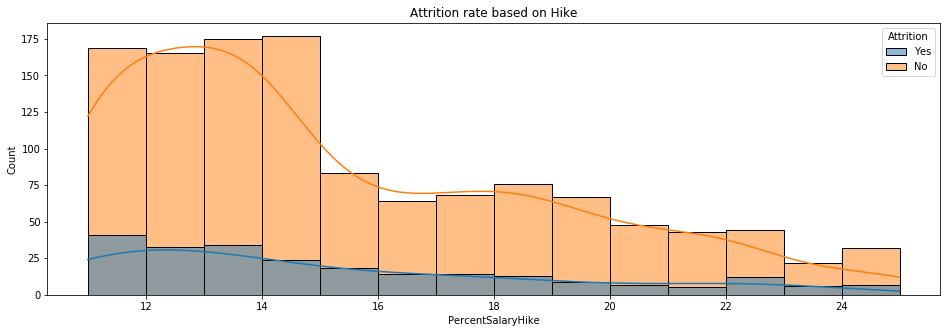

In [23]:
# lets see the attrition rate based on the salary hike
plt.figure(figsize=(16,5))
sns.histplot(data=hr_data, x='PercentSalaryHike', hue='Attrition', kde=True)
plt.title("Attrition rate based on Hike")
plt.show()

The graph shows that most of the employees have small percentage hike and this is the reason for them leaving the job. 

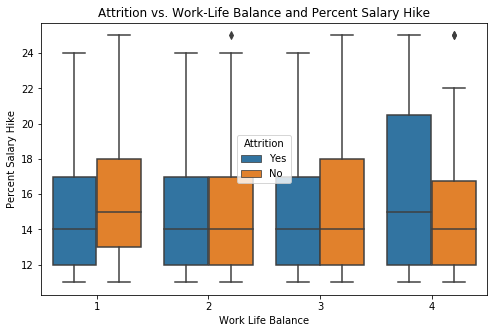

In [24]:
# lets consider percentage salary hike with the work life balance for attrition

plt.figure(figsize=(8,5))
sns.boxplot(data=hr_data, hue='Attrition', y='PercentSalaryHike', x='WorkLifeBalance')
plt.title("Attrition vs. Work-Life Balance and Percent Salary Hike")
plt.xlabel('Work Life Balance')
plt.ylabel('Percent Salary Hike')
plt.legend(title='Attrition')
plt.show()

1. Employees who have a poor work-life balance are more likely to leave the company.This suggests that work-life balance is more important than salary hike for employee retention.
2. Employees who receive a low salary hike are more likely to leave the company. 
3. There are number of employees who left the company even though they had a good work-life balance and received a high salary hike. These employees may have left for other reasons.
4. There is also a small number of employees who stayed with the company even though they had a poor work-life balance and received a high salary hike.

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
****************************************
JobSatisfaction          1          2          3          4
Attrition                                                  
No               18.085969  18.978102  29.927007  33.008921
Yes              27.848101  19.409283  30.801688  21.940928


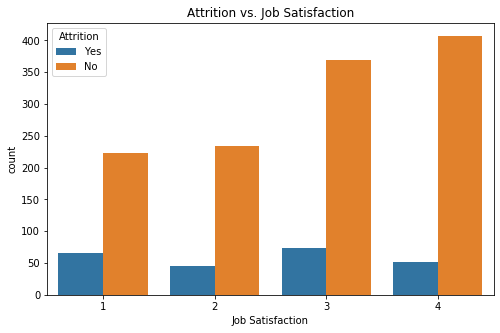

In [25]:
print(hr_data['JobSatisfaction'].value_counts())
print('*'*40)
changed = pd.crosstab(hr_data['Attrition'], hr_data['JobSatisfaction'], normalize='index')*100
print(changed)

# let check how job satisfaction affects attrition

plt.figure(figsize=(8,5))
sns.countplot(data=hr_data, hue='Attrition', x='JobSatisfaction')
plt.title("Attrition vs. Job Satisfaction")
plt.xlabel('Job Satisfaction')
plt.show()

We can see that attrition is high in people who are not satisfied with their job. People who have 'high' or 'very high' job satisfication are have high attrition meaning they may be other factors resulting in attrition even though they are satisfied with their jobs.

YearsSinceLastPromotion         0          1          2         3         4   \
Attrition                                                                      
No                       38.199513  24.979724  10.705596  3.487429  4.541768   
Yes                      46.413502  20.675105  11.392405  3.797468  2.109705   

YearsSinceLastPromotion        5         6         7         8         9   \
Attrition                                                                   
No                       3.487429  2.108678  4.866180  1.459854  1.054339   
Yes                      0.843882  2.531646  6.751055  0.000000  1.687764   

YearsSinceLastPromotion        10        11       12        13        14  \
Attrition                                                                  
No                       0.405515  1.784266  0.81103  0.648824  0.648824   
Yes                      0.421941  0.843882  0.00000  0.843882  0.421941   

YearsSinceLastPromotion        15  
Attrition                    

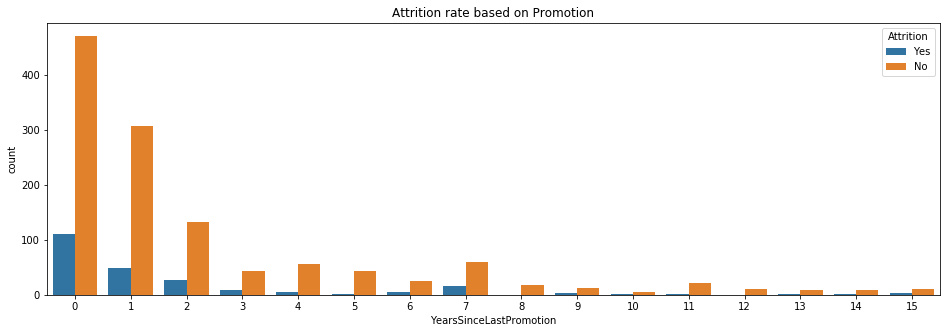

In [26]:
changed = pd.crosstab(hr_data['Attrition'], hr_data['YearsSinceLastPromotion'], normalize='index')*100
print(changed)
# lets see the attrition rate based on last promotion
plt.figure(figsize=(16,5))
sns.countplot(data=hr_data, x='YearsSinceLastPromotion', hue='Attrition')
plt.title("Attrition rate based on Promotion")
plt.show()

From the plot above we can say that people who are promoted in last 3 years have higher attrition instead of people whose promotion was 10 or more years ago.

In [27]:
# lets see how a person's education affects the current job role

print(hr_data['JobRole'].value_counts())

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


**Education--**
1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor'.

Education                   1   2    3    4   5
JobRole                                        
Healthcare Representative  15  21   48   44   3
Human Resources             5  12   22   10   3
Laboratory Technician      35  57  104   58   5
Manager                     9  19   40   29   5
Manufacturing Director     15  33   54   38   5
Research Director           7  13   30   23   7
Research Scientist         37  46  122   79   8
Sales Executive            27  66  120  101  12
Sales Representative       20  15   32   16   0
************************************************************


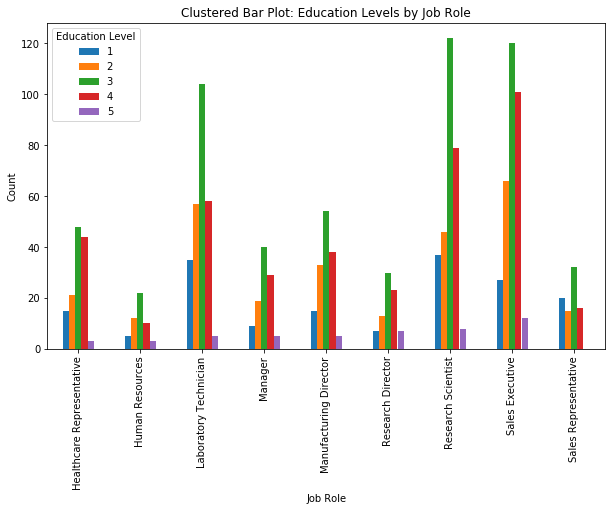

In [28]:
table = pd.crosstab(hr_data['JobRole'], hr_data['Education'])
print(table)
print("*"*60)
table.plot(kind='bar', figsize=(10, 6))
plt.title("Clustered Bar Plot: Education Levels by Job Role")
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Education Level')
plt.show()

1. The graph shows the count of employees with different education levels (ranging from 1 to 5) within each job role.
2. The 'Sales Representative' role shows a more limited range of education levels (1 to 3), suggesting that this role may not require higher levels of education.
3. Most of the jobs have a higher count of employees with education level 3, the roles typically requires at least a moderate level of education.
4. The 'Manager' role shows a balanced distribution across education levels, indicating that managers have diverse educational backgrounds.


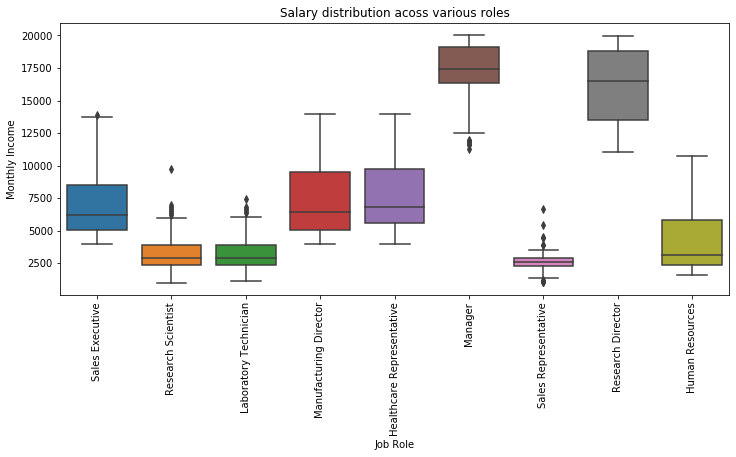

In [29]:
# lets check the distribution of incomes across various roles

plt.figure(figsize=(12,5))
sns.boxplot(data=hr_data, y='MonthlyIncome', x='JobRole')
plt.title("Salary distribution acoss various roles")
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.xticks(rotation=90)
plt.show()

The graph shows that the average salary for the roles of manager and research director are high as compared to the other role.
the average salary for sales representatives are the the lowest

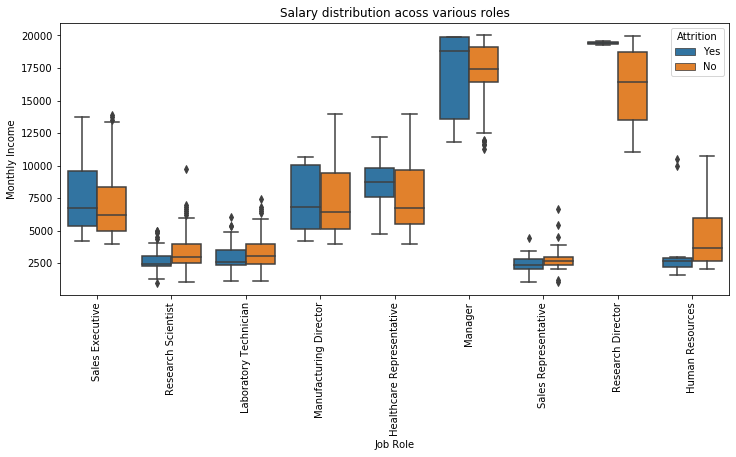

In [30]:
# lets check for attrition in the above graph
plt.figure(figsize=(12,5))
sns.boxplot(data=hr_data, y='MonthlyIncome', x='JobRole', hue='Attrition')
plt.title("Salary distribution acoss various roles")
plt.xlabel('Job Role')
plt.ylabel('Monthly Income')
plt.legend(title='Attrition')
plt.xticks(rotation=90)
plt.show()

1. Managers are the one with the highest attrition even thogh they have the highest salaries.
2. we can also say that for the same role, people who sitched have higher average salary than the one who did not except for the the roles of HR, Sales Representative, Research Scientist and Lab Tech. 

In [31]:
# lets check for the categorical data
hr_data.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [32]:
# using label encoder to convert categorical column to numerical in dataset
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns in your dataset
cat_columns = ['Attrition','BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime']

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in cat_columns:
    hr_data[col] = label_encoder.fit_transform(hr_data[col])

# Display the updated dataset
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,0,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,0,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


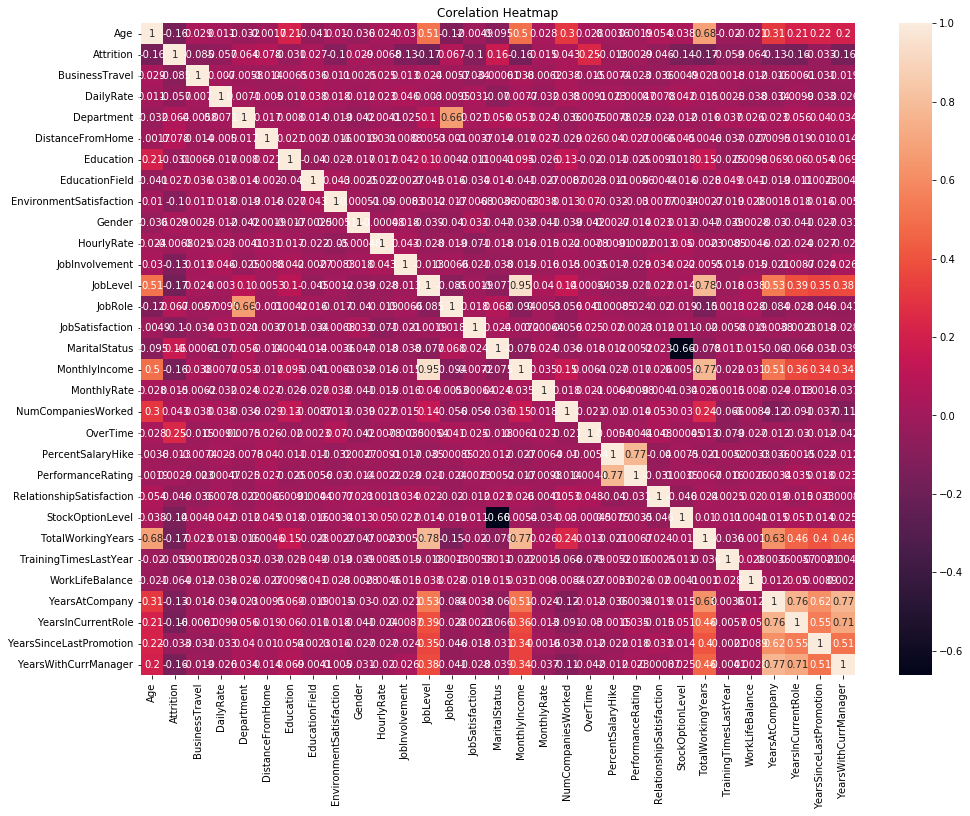

In [33]:
# lets check for correlation among columns

plt.figure(figsize=(16,12))
sns.heatmap(hr_data.corr(), annot=True)
plt.title("Corelation Heatmap")
plt.show()

In [34]:
# lets check the correlation of features with the target variable

hr_data.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
BusinessTravel             -0.085306
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

'TotalWorkingYears', 'JobLevel', 'YearsInCurrentRole', 'MonthlyIncome', 'Age', and 'YearsWithCurrManager' have relatively strong negative correlations with 'Attrition'. This shows that employees with higher total working years, job levels, longer durations in their current role, higher monthly income, older age, and longer tenure with current managers tend to have lower attrition rates.

'StockOptionLevel', 'YearsAtCompany', 'JobInvolvement', 'JobSatisfaction', 'EnvironmentSatisfaction', 'BusinessTravel', and 'WorkLifeBalance' show weaker negative correlations with 'Attrition'.

Variables such as 'DistanceFromHome', 'Department', 'JobRole', 'NumCompaniesWorked', 'Gender', 'EducationField', 'MonthlyRate', 'HourlyRate', 'PerformanceRating', and 'TrainingTimesLastYear' show weak positive correlations with 'Attrition'.

'MaritalStatus' and 'OverTime' have relatively strong positive correlations with 'Attrition', suggesting that the employees who are single and those who work overtime may have higher attrition rates.

In [35]:
X = hr_data.drop('Attrition', axis=1)
y = hr_data['Attrition']


In [36]:
#lets check for skewness and outliers in the dataset
X.skew().sort_values()

BusinessTravel             -1.210750
WorkLifeBalance            -0.552480
JobInvolvement             -0.498419
Gender                     -0.408665
JobRole                    -0.357270
JobSatisfaction            -0.329672
EnvironmentSatisfaction    -0.321654
RelationshipSatisfaction   -0.302828
Education                  -0.289681
MaritalStatus              -0.152175
HourlyRate                 -0.032311
DailyRate                  -0.003519
MonthlyRate                 0.018578
Department                  0.172231
Age                         0.413286
EducationField              0.550371
TrainingTimesLastYear       0.553124
PercentSalaryHike           0.821128
YearsWithCurrManager        0.833451
YearsInCurrentRole          0.917363
DistanceFromHome            0.958118
OverTime                    0.964489
StockOptionLevel            0.968980
JobLevel                    1.025401
NumCompaniesWorked          1.026471
TotalWorkingYears           1.117172
MonthlyIncome               1.369817
Y

In [37]:
# finding and transforming outliers
# Iterate over each column in X
for col in X.columns:
    # Calculate the lower and upper thresholds for the column
    Q1 = np.percentile(X[col], 25)
    Q3 = np.percentile(X[col], 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR

    # Replace outliers in the column with threshold values
    X[col] = np.where(X[col] < lower_threshold, lower_threshold, X[col])
    X[col] = np.where(X[col] > upper_threshold, upper_threshold, X[col])

The values in the dataset that are outside these thresholds are outliers. Since this dataset is small, we will transform these outliers using flooring or capping method. In this method, a threshold is set and values above or below that threshold is replaced with the nearest non-outlying value, in this case the threshold.

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

# scaling the dataset
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# splitting data into train and tests set
X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size=0.30, random_state=42)

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (1029, 30)
X_test shape (441, 30)
y_train shape (1029,)
y_test shape (441,)


We have seen that the data in the target variable is imbalanced. We will increase the number of samples in the minority classes by replicating or generating synthetic samples. By doing so, oversampling aims to balance the class distribution and improve the model's ability to learn from the minority class. Here we will use SMOTE method for oversampling.

In [39]:
# oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [40]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)
print('y_train shape', y_train.shape)
print('y_test shape', y_test.shape)

X_train shape (1706, 30)
X_test shape (441, 30)
y_train shape (1706,)
y_test shape (441,)


In [41]:
from sklearn.metrics import (confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,recall_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

models = [
    ('KNeighbors', KNeighborsClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('RandomForest', RandomForestClassifier(n_estimators=100)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100))]

scores_df = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

for name, model in models:
    print("Model: ", str(model))
    print("\n")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

    # Calculate the scores
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Add scores to the DataFrame
    scores_df = scores_df.append({'Model': name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision, 'Recall': recall}, ignore_index=True)

print(scores_df)


Model:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


[[252 128]
 [ 22  39]]
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       380
           1       0.23      0.64      0.34        61

   micro avg       0.66      0.66      0.66       441
   macro avg       0.58      0.65      0.56       441
weighted avg       0.82      0.66      0.71       441

Model:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


[[338  42]
 [ 43  18]]
              precision    recall  f1-score   support

           0       0.89      0.89  

1. 'RandomForest' and 'AdaBoost' models have the highest accuracy (0.8617). This metric measures the overall correctness of the predictions and can be a good indicator, especially when classes are balanced.
2. 'AdaBoost' model has the highest F1 score (0.8592).F1 score is useful when there is an uneven class distribution.
3. 'RandomForest' and 'AdaBoost' models have similar precision and recall values (around 0.857), indicating a balance between correctly identifying positive cases (attrition) and minimizing false positives.


In [42]:
# checking cv score for different classifiers
for name, model in models:
    cv_score = cross_val_score(model, X_s, y, cv=5, scoring='accuracy')
    accuracy = accuracy_score(y_test, y_pred)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Difference between accuracy and cv score is: ", accuracy-cv_score.mean())
    print("\n")

Model : KNeighbors
cv_score : [0.8440678  0.85084746 0.84013605 0.83959044 0.86348123]
Mean Score 0.8476245962028012
Difference between accuracy and cv score is:  0.014053408332346251


Model : DecisionTree
cv_score : [0.77966102 0.77288136 0.78571429 0.778157   0.80204778]
Mean Score 0.7836922873505276
Difference between accuracy and cv score is:  0.07798571718461977


Model : RandomForest
cv_score : [0.85084746 0.86440678 0.8707483  0.84641638 0.8668942 ]
Mean Score 0.8598626233625284
Difference between accuracy and cv score is:  0.001815381172619035


Model : AdaBoost
cv_score : [0.86779661 0.8779661  0.84693878 0.88054608 0.9112628 ]
Mean Score 0.8769020722189496
Difference between accuracy and cv score is:  -0.015224067683802134




1. KNeighbors has a mean cross-validation score of  0.8476 and a difference of 0.0141 (Accuracy > Mean CV Score)
2. DecisionTree has a mean cross-validation score of 0.7918 and a difference of 0.0698 (Accuracy > Mean CV Score)
3. RandomForest has a mean cross-validation score of 0.8544 and a difference of 0.0073 (Accuracy > Mean CV Score)
4. AdaBoost has a mean cross-validation score of 0.8769 and a difference of -0.0152 (Accuracy < Mean CV Score)


Based on the accuracy and cross-validation results, as well as the differences between accuracy and cross-validation scores, the **"RandomForest"** model seems to be performing the best among the given models with a high **Accuracy** of **0.8617**, **Mean Cross-Validation Score** of **0.8544**.

It has a relatively small difference between accuracy and the mean cross-validation score. This suggests that the model's performance is consistent and may generalize well to unseen data.

In [43]:
# Hyper parameter tuning

# Defining the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV( RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [45]:
# Get the best parameters and the best score
print("best_params",grid_search.best_params_)
print()
print("best_score",grid_search.best_score_)

best_params {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

best_score 0.936694021101993


In [46]:
# final model
final = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1)
final.fit(X_train, y_train)
final_pred = final.predict(X_test)
print("Accuracy_final :", accuracy_score(y_test,final_pred)*100)

Accuracy_final : 85.71428571428571


Area : 0.7684641932700603


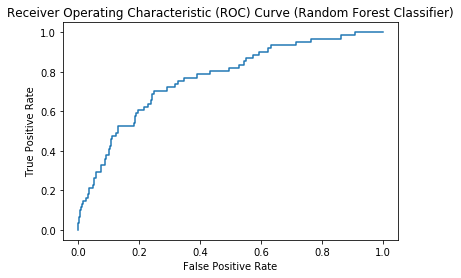

AUC_Score : 0.5661777394305436


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# calculating predicted probabilities for the positive class
y_pred_probs = final.predict_proba(X_test)[:, 1]

#Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr,tpr)
print("Area :",roc_auc)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest Classifier)')
plt.show()

# Calculate the AUC-ROC score using roc_auc_score
auc_score = roc_auc_score(y_test, final_pred)
print("AUC_Score :",auc_score)

In [48]:
# saving the model
import joblib
joblib.dump(final, "HR_Analytics.pkl")

['HR_Analytics.pkl']

In [50]:
# predicting on the X_test with the saved model
#loading the aved model
model = joblib.load("HR_Analytics.pkl")

# prediction
prediction = model.predict(X_test)
prediction[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [51]:
# comparing actual values and predicted values
pred = pd.DataFrame({'predicted':prediction, 'actual':y_test})
pred.head(10)

,predicted,actual
1041,0,0
184,0,0
1222,0,1
67,0,0
220,0,0
494,0,0
430,0,0
240,0,0
218,0,0
49,0,0


**Conclusion**

Conducted a thorough analysis of HR attrition using various visualizations, data preprocessing steps, oversampling techniques, model building, hyperparameter tuning, and model evaluation. Here are some key insights and conclusions that can be drawn from your analysis:
1. The dataset is imbalanced, with around 16% of employees leaving the company (attrition).
2. The distribution of attrition across different categorical variables like 'Gender', 'Department', 'MaritalStatus', 'PerformanceRating', 'JobSatisfaction', 'WorkLifeBalance', and 'BusinessTravel' has been visualized, providing insights into how these factors influence attrition rates.
3. The attrition rate varies across different demographic categories. For example, attrition is higher among single employees compared to married employees.
4. The age-wise attrition distribution shows that younger employees, particularly those between 26-32, tend to have higher attrition rates.
5. The analysis of job roles and attrition reveals that certain job roles have higher attrition rates compared to others.
6. The box plot of salary distribution across various roles suggests that roles like 'Manager' and 'Research Director' have higher average salaries.